In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras import losses, optimizers

In [2]:
data = pd.read_csv("C:\Lachin\DataSets\Heart Failure Prediction\heart_dummy.csv")

In [3]:
data.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_1,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,172,0.0,0,1,1,0,0,0,1,0,0,0,1
1,49,160,180,156,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,130,283,98,0.0,0,1,1,0,0,0,0,1,0,0,1
3,48,138,214,108,1.5,1,0,0,0,0,0,1,0,1,1,0
4,54,150,195,122,0.0,0,1,0,1,0,0,1,0,0,0,1


In [4]:
x = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

#### Model Architecture

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(100, activation='relu', input_shape = x_train.shape[1:]))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1600      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 11,801
Trainable params: 11,801
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.weights #Random weights assigned

[<tf.Variable 'dense/kernel:0' shape=(15, 100) dtype=float32, numpy=
 array([[ 0.21004833, -0.16673091, -0.22547054, ...,  0.13032104,
          0.07349201, -0.01848751],
        [ 0.22465585, -0.14273843,  0.19976257, ..., -0.04228981,
          0.12022807, -0.04967897],
        [ 0.22812055,  0.1551084 , -0.13298044, ..., -0.19231617,
          0.21445693, -0.11307776],
        ...,
        [ 0.08761482, -0.02320221, -0.03473781, ..., -0.00750729,
         -0.05139861,  0.00246523],
        [ 0.20297427, -0.21509165, -0.06344867, ...,  0.18923931,
          0.10806249, -0.00354433],
        [-0.15045828, -0.07599039,  0.1949989 , ..., -0.13006717,
          0.21338193, -0.12675738]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(100,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [12]:
weights, biases = model.layers[1].get_weights()

In [13]:
print(weights)

[[-0.04442975  0.01423581  0.07641631 ...  0.13030133  0.12828046
   0.02625799]
 [-0.13241196  0.04709594 -0.065683   ... -0.12531301  0.10229179
   0.08144078]
 [ 0.03172792 -0.10774606 -0.05631218 ...  0.09200728  0.02091381
   0.09618297]
 ...
 [ 0.09041843 -0.00378476 -0.13030495 ... -0.0454101   0.02672219
  -0.06181222]
 [-0.11898421 -0.14687614 -0.0452825  ...  0.15473595  0.07570553
  -0.03421159]
 [ 0.02139424  0.04550095 -0.04135048 ...  0.10917753 -0.11368705
   0.03337437]]


In [15]:
print(biases)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [29]:
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.Adamax(), metrics=['acc'])

In [48]:
train_model = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=10)

Epoch 1/10
23/23 [==============================] - 0s 4ms/step - loss: 0.3379 - acc: 0.8525 - val_loss: 0.3035 - val_acc: 0.8596
Epoch 2/10
23/23 [==============================] - 0s 3ms/step - loss: 0.3370 - acc: 0.8596 - val_loss: 0.3023 - val_acc: 0.8652
Epoch 3/10
23/23 [==============================] - 0s 3ms/step - loss: 0.3376 - acc: 0.8539 - val_loss: 0.3023 - val_acc: 0.8652
Epoch 4/10
23/23 [==============================] - 0s 4ms/step - loss: 0.3369 - acc: 0.8596 - val_loss: 0.3026 - val_acc: 0.8596
Epoch 5/10
23/23 [==============================] - 0s 4ms/step - loss: 0.3390 - acc: 0.8624 - val_loss: 0.3012 - val_acc: 0.8652
Epoch 6/10
23/23 [==============================] - 0s 4ms/step - loss: 0.3363 - acc: 0.8525 - val_loss: 0.3019 - val_acc: 0.8652
Epoch 7/10
23/23 [==============================] - 0s 3ms/step - loss: 0.3355 - acc: 0.8581 - val_loss: 0.3023 - val_acc: 0.8652
Epoch 8/10
23/23 [==============================] - 0s 3ms/step - loss: 0.3373 - acc: 0.86

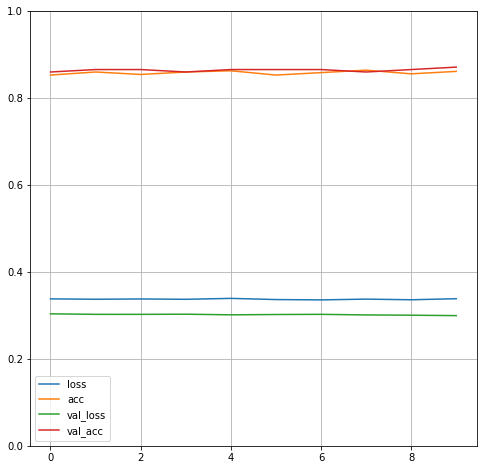

In [49]:
pd.DataFrame(train_model.history).plot(figsize=(8,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [64]:
model.evaluate(x_test,y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.2993 - acc: 0.8708


[0.29931649565696716, 0.8707864880561829]

In [67]:
model.predict_classes(x_test.values)

C:\Users\acer\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
    

In [121]:
x_new = x_test.values[-1:]
x_new

array([[ 51. , 140. , 308. , 142. ,   1.5,   0. ,   0. ,   1. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   1. ]])

In [122]:
model.predict_classes(x_new)

array([[0]])

#### Model Saving

In [77]:
model.save('Heart_prediction_ANN.h5')

In [78]:
model.save("C:\Lachin\DataSets\Heart Failure Prediction\Heart_prediction_ANN.h5")